<a href="https://colab.research.google.com/github/anthonybrown0528/csc-442-course-project/blob/main/notebook/hw7/individual_analysis_model_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Individual Analysis

**Business Goal:** The goal of this project is to predict the popularity and audience satisfaction of films that are available on Netflix given characteristics of the film by analyzing the relationship between those film characteristics and the IMDb score and number of votes for the particular film. The unit of analysis will be Netflix films.

**Subgoal:** The subgoal for this task is to analyze the relationship between a film’s IMDb score and a short summary of the film’s plot by building a predictive model where the score is the response variable and a vector representation of the film description compose the explanatory variables.

### Columns Considered for this Analysis

| Field | Description | Data Type | Attribute Type |
| :---- | :---- | :---- | :---- |
| title | Title of the film | \> 10 unique values, text | nominal |
| release\_year | year in which the film was released | integer | interval |
| description | short synopsis of the film | \> 10 unique values, text | nominal |
| genre | category associated with a film | \> 10 unique values, text | nominal |
| imdb\_score | IMDb rating | continuous | interval |


## Description Analysis

In [1]:
import pandas as pd

In [2]:
# Load the cleaned dataset
filepath = 'https://raw.githubusercontent.com/anthonybrown0528/csc-442-course-project/refs/heads/main/dataset/clean/hw6/netflix_film_imdb_scores_cleaned_descriptions_df.csv'
df = pd.read_csv(filepath)

In [3]:
df.head()

,title,description_x,release_year,runtime,imdb_id,imdb_score,imdb_votes,show_id,type,director,...,country,date_added,age_certification,num_releases,listed_in,description_y,num_listed_in,first_cast,cast_freq_mean,genre_freq_mean
0,Monty Python and the Holy Grail,King Arthur accompany squire recruit Knights R...,1975,91,tt0071853,8.2,530877,s4218,Movie,"Terry Gilliam, Terry Jones",...,United Kingdom,"January 2, 2019",PG,1,"Action & Adventure, Classic Movies, Comedies",The Monty Python comedy clan skewers King Arth...,3,Graham Chapman,10.888889,831.000000
1,My Fair Lady,snobbish phonetics professor agree wager take ...,1964,170,tt0058385,7.8,94121,s1127,Movie,George Cukor,...,United States,"April 1, 2021",G,1,"Classic Movies, Music & Musicals",When a Cockney flower girl takes elocution les...,2,Audrey Hepburn,1.083333,203.500000
2,The Blue Lagoon,Two small child ship cook survive shipwreck fi...,1980,104,tt0080453,5.8,69053,s176,Movie,Randal Kleiser,...,United States,"September 1, 2021",R,1,"Dramas, Romantic Movies","Two shipwrecked children, stranded for years o...",2,Brooke Shields,1.375000,1446.500000
3,Bonnie and Clyde,In 1930s bore waitress Bonnie Parker fall love...,1967,110,tt0061418,7.7,111189,s6359,Movie,Arthur Penn,...,United States,"January 1, 2021",R,1,"Action & Adventure, Classic Movies, Dramas","Bonnie Parker and Clyde Barrow are young, in l...",3,Warren Beatty,1.777778,1076.333333
4,The Guns of Navarone,team allied saboteur assign impossible mission...,1961,158,tt0054953,7.5,50150,s178,Movie,J. Lee Thompson,...,"United Kingdom, United States","September 1, 2021",TV-14,1,"Action & Adventure, Classic Movies","During World War II, British forces launch an ...",2,Gregory Peck,1.300000,459.500000


In [4]:
# Select only a portion of the columns for analysis
column_subset = ['title', 'release_year', 'listed_in', 'description_x', 'imdb_score']
query_df = df[column_subset]

query_df

,title,release_year,listed_in,description_x,imdb_score
0,Monty Python and the Holy Grail,1975,"Action & Adventure, Classic Movies, Comedies",King Arthur accompany squire recruit Knights R...,8.2
1,My Fair Lady,1964,"Classic Movies, Music & Musicals",snobbish phonetics professor agree wager take ...,7.8
2,The Blue Lagoon,1980,"Dramas, Romantic Movies",Two small child ship cook survive shipwreck fi...,5.8
3,Bonnie and Clyde,1967,"Action & Adventure, Classic Movies, Dramas",In 1930s bore waitress Bonnie Parker fall love...,7.7
4,The Guns of Navarone,1961,"Action & Adventure, Classic Movies",team allied saboteur assign impossible mission...,7.5
...,...,...,...,...,...
2472,Myriam Fares: The Journey,2021,"Documentaries, International Movies, Music & M...",From pregnancy album preparation Lebanese sing...,2.3
2473,The Tambour of Retribution,2021,"Dramas, International Movies, Romantic Movies",son swordsman fall love daughter Tagaga social...,6.9
2474,Pitta Kathalu,2021,"International TV Shows, TV Dramas",Four different woman four journey love betraya...,5.1
2475,Loyiso Gola: Unlearning,2021,Stand-Up Comedy,South African comedian Loyiso Gola serve filte...,5.9


In [5]:
# Split the data into a training and test set with a 70/30 split
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(query_df, test_size=0.3, random_state=42)

In [6]:
# Used to store the performance of each model
model_scores = []

In [7]:
# Denote the explanatory and response variables
features = ['title', 'release_year', 'genre', 'description']
response = 'imdb_score'

In [8]:
def separate_genre_df(data):
  """
  Construct a dataframe where each entry corresponds to a (movie, genre) pair
  """

  movie_genre_map = {
      'title': [],
      'release_year': [],
      'genre': [],
      'description': [],
      'imdb_score': []
  }

  for _, row in data.iterrows():

    # Split the genres which are separated by commas
    genres = row['listed_in'].split(',')

    # Add a row for the current movie for each associated genre
    for genre in genres:
      movie_genre_map['title'].append(row['title'])
      movie_genre_map['release_year'].append(row['release_year'])
      movie_genre_map['genre'].append(genre.strip())
      movie_genre_map['description'].append(row['description_x'].strip())
      movie_genre_map['imdb_score'].append(row['imdb_score'])


  movie_genre_df = pd.DataFrame(movie_genre_map)

  # Exclude international movies and international TV shows as categories
  movie_genre_df = movie_genre_df[movie_genre_df['genre'] != 'International Movies']
  movie_genre_df = movie_genre_df[movie_genre_df['genre'] != 'International TV Shows']

  movie_genre_df

  return movie_genre_df

data_cleaned_df = separate_genre_df(train_set)

# Separate the data into a dataframe of features and one for the target variable
feature_df = data_cleaned_df[features]
target_df = data_cleaned_df[response]

# Identify the number of genres represented
data_cleaned_df['genre'].nunique()

39

In [9]:
X_train = data_cleaned_df[features]
y_train = data_cleaned_df['imdb_score']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [12]:
"""
Train and validate a model using film descriptions as features transformed by
the classification probabilities of a Naive Bayes classifier. The final model
in the pipeline is a linear regression model without regularization. The words
are transformed using TF vectorization (CountVectorizer).
"""

# use 5-fold cross validation
n_splits = 5

cv = KFold(n_splits=n_splits)
cv_scores = np.zeros(n_splits)
errors = np.zeros(n_splits)

for index, (train, val) in enumerate(cv.split(X_train, y_train)):
  X_train_train = X_train.iloc[train]
  y_train_train = y_train.iloc[train]

  X_train_val = X_train.iloc[val]
  y_train_val = y_train.iloc[val]

  # Set up a pipeline for feature extraction
  genre_probabilities_pipeline = Pipeline([('vectorizer', CountVectorizer(stop_words='english')), ('topic_model', MultinomialNB())])
  genre_probabilities_pipeline = genre_probabilities_pipeline.fit(X=X_train_train['description'], y=X_train_train['genre'])

  # Set up a pipeline for regression
  X_train_tmp = X_train_train.copy()

  X_train_tmp['imdb_score'] = y_train_train
  X_train_tmp = X_train_tmp.drop_duplicates(subset=['title', 'release_year'])

  X_train_train = X_train_tmp[features]
  y_train_train = X_train_tmp['imdb_score']

  compressed_feature = genre_probabilities_pipeline.predict_proba(X=X_train_train['description'])

  genre_weights_score_pipeline = Pipeline([('regressor', LinearRegression())])

  genre_weights_score_pipeline = genre_weights_score_pipeline.fit(X=compressed_feature, y=y_train_train)

  # Validate the final model

  X_val_tmp = X_train_val.copy()

  X_val_tmp['imdb_score'] = y_train_val
  X_val_tmp = X_val_tmp.drop_duplicates(subset=['title', 'release_year'])

  X_train_val = X_val_tmp[features]
  y_train_val = X_val_tmp['imdb_score']

  compressed_feature = genre_probabilities_pipeline.predict_proba(X=X_train_val['description'])
  score = genre_weights_score_pipeline.score(X=compressed_feature, y=y_train_val)

  # Record the model score
  cv_scores[index] = score
  errors[index] = mean_squared_error(y_train_val, genre_weights_score_pipeline.predict(compressed_feature))

In [13]:
# Find the R2 score of the model
print(cv_scores)
cv_scores.mean()

model_scores.append(cv_scores.mean())

[ 0.0177179   0.05163403  0.03340853 -0.04583184  0.01970477]


In [14]:
# Find the error in the model
print(errors)
errors.mean()

[1.4098377  1.2867272  1.38155373 1.26159287 1.28436292]


np.float64(1.3248148818026286)

In [15]:
"""
Train and validate a model using film descriptions as features transformed by
the classification probabilities of a Naive Bayes classifier. The final model
in the pipeline is a linear regression model without regularization. The words
are transformed using TF-IDF vectorization (TfidfVectorizer).
"""

# use 5-fold cross validation
n_splits = 5

cv = KFold(n_splits=n_splits)
cv_scores = np.zeros(n_splits)

for index, (train, val) in enumerate(cv.split(X_train, y_train)):
  X_train_train = X_train.iloc[train]
  y_train_train = y_train.iloc[train]

  X_train_val = X_train.iloc[val]
  y_train_val = y_train.iloc[val]

  # Set up a pipeline for feature extraction
  genre_probabilities_pipeline = Pipeline([('vectorizer', TfidfVectorizer(stop_words='english')), ('topic_model', MultinomialNB())])
  genre_probabilities_pipeline = genre_probabilities_pipeline.fit(X=X_train_train['description'], y=X_train_train['genre'])

  # Set up a pipeline for regression
  X_train_tmp = X_train_train.copy()

  X_train_tmp['imdb_score'] = y_train_train
  X_train_tmp = X_train_tmp.drop_duplicates(subset=['title', 'release_year'])

  X_train_train = X_train_tmp[features]
  y_train_train = X_train_tmp['imdb_score']

  compressed_feature = genre_probabilities_pipeline.predict_proba(X=X_train_train['description'])

  genre_weights_score_pipeline = Pipeline([('regressor', LinearRegression())])

  genre_weights_score_pipeline = genre_weights_score_pipeline.fit(X=compressed_feature, y=y_train_train)

  genres = X_train['genre'].unique()

  # Validate the final model

  X_val_tmp = X_train_val.copy()

  X_val_tmp['imdb_score'] = y_train_val
  X_val_tmp = X_val_tmp.drop_duplicates(subset=['title', 'release_year'])

  X_train_val = X_val_tmp[features]
  y_train_val = X_val_tmp['imdb_score']

  compressed_feature = genre_probabilities_pipeline.predict_proba(X=X_train_val['description'])
  score = genre_weights_score_pipeline.score(X=compressed_feature, y=y_train_val)

  # Record the model score
  cv_scores[index] = score
  errors[index] = mean_squared_error(y_train_val, genre_weights_score_pipeline.predict(compressed_feature))

<Axes: xlabel='genre', ylabel='coef'>

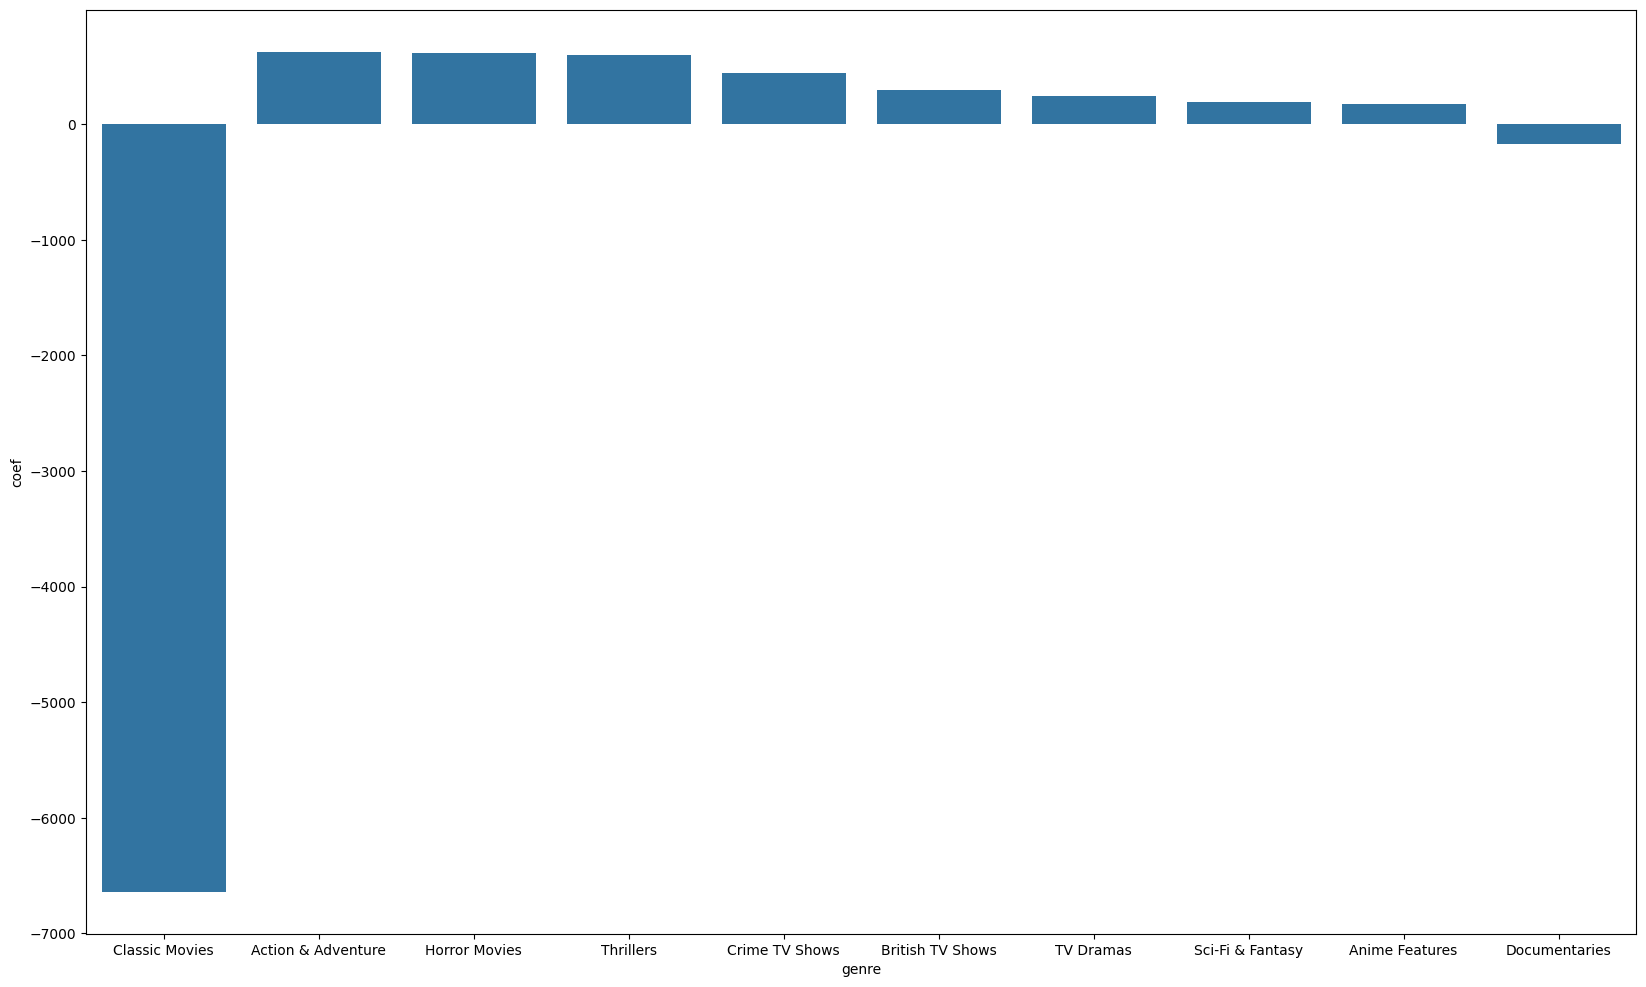

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the coefficients for each genre
coefficients = genre_weights_score_pipeline['regressor'].coef_
words = genres

results_df = {
    'coef': coefficients,
    'genre': words,
}

# Find the 10 most significant genre given by the cluster of words. The
# significance is determined by the magnitude of the coefficients in the
# linear regression model
results_df = pd.DataFrame(results_df)
results_df['abs_coef'] = np.abs(results_df['coef'])
significant_words = results_df.sort_values(by='abs_coef', ascending=False).iloc[:10]

plt.figure(figsize=(20,12))  # set plot size (denoted in inches) Source: https://stackoverflow.com/questions/59447378/sklearn-plot-tree-plot-is-too-small
sns.barplot(significant_words, x='genre', y='coef')

In [17]:
# Find the R2 score of the model
print(cv_scores)
cv_scores.mean()

model_scores.append(cv_scores.mean())

[0.05122026 0.06349457 0.02563788 0.05673798 0.05915987]


In [18]:
# Find the error in the model
print(errors)
errors.mean()

[1.36175284 1.27063501 1.39266035 1.13786231 1.23266964]


np.float64(1.2791160329730284)

In [19]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV

In [20]:
"""
Train and validate a model using film descriptions as features transformed by
a generative Latent Dirichlet Allocation model. The final model
in the pipeline is a linear regression model without regularization. The words
are transformed using TF-IDF vectorization (TfidfVectorizer).
"""

# Use 5-fold cross validation
n_splits = 5

cv = KFold(n_splits=n_splits)
cv_scores = np.zeros(n_splits)

# Set up a 3-step pipeline
genre_weights_score_pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('decomposer', LatentDirichletAllocation()),
    ('regressor', LinearRegression())]
)

# Specify the hyperparameters to tune
grid_search = GridSearchCV(genre_weights_score_pipeline, param_grid={
    'vectorizer__stop_words': ['english'],
    'decomposer__n_components': [40]
})

# Train and determine the best set of hyperparameters
grid_search = grid_search.fit(X=X_train['description'], y=y_train)
genre_weights_score_pipeline = grid_search.best_estimator_

# Record the model score
cv_results_df = pd.DataFrame(grid_search.cv_results_)
model_scores.append(float(cv_results_df[cv_results_df['rank_test_score'] == 1]['mean_test_score'].iloc[0]))

cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_decomposer__n_components,param_vectorizer__stop_words,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,6.989001,3.688129,0.168841,0.010786,40,english,"{'decomposer__n_components': 40, 'vectorizer__...",0.018128,0.009644,-0.004718,0.011135,-0.005072,0.005823,0.009209,1


In [21]:
"""
Train and validate a model using film descriptions as features without
transforming features after vectorization. The final model in the pipeline is a
linear regression model without regularization. The words are transformed using
TF vectorization (CountVectorizer).
"""

# Use 5-fold cross validation
n_splits = 5

cv = KFold(n_splits=n_splits)
cv_scores = np.zeros(n_splits)

# Set up a 2-step pipeline
genre_weights_score_pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('regressor', LinearRegression())]
)

# Specify the hyperparameters to tune
grid_search = GridSearchCV(genre_weights_score_pipeline, param_grid={
    'vectorizer__stop_words': ['english', None],
    'vectorizer__max_features': [None, 100, 1000],
    'vectorizer__min_df': [1, 0.1, 0.01, 0.001]
})

# Train and determine the best set of hyperparameters
grid_search = grid_search.fit(X=X_train['description'], y=y_train)
genre_weights_score_pipeline = grid_search.best_estimator_

# Record the model score
cv_results_df = pd.DataFrame(grid_search.cv_results_)
model_scores.append(float(cv_results_df[cv_results_df['rank_test_score'] == 1]['mean_test_score'].iloc[0]))

cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_vectorizer__max_features,param_vectorizer__min_df,param_vectorizer__stop_words,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.125161,0.022255,0.017540,0.003355,None,1.000,english,"{'vectorizer__max_features': None, 'vectorizer...",-0.524108,-0.510606,-0.471002,-0.338540,-0.657345,-0.500320,0.102334,18
1,0.175775,0.004141,0.024931,0.002474,None,1.000,None,"{'vectorizer__max_features': None, 'vectorizer...",-0.552223,-0.469194,-0.436135,-0.348244,-0.608719,-0.482903,0.090712,17
2,0.102144,0.007573,0.021206,0.001253,None,0.100,english,"{'vectorizer__max_features': None, 'vectorizer...",0.003285,0.003883,-0.016940,-0.004916,-0.015070,-0.005951,0.008798,4
3,0.100659,0.001685,0.020544,0.001289,None,0.100,None,"{'vectorizer__max_features': None, 'vectorizer...",-0.002922,0.011374,-0.017830,-0.002423,-0.009450,-0.004250,0.009599,1
4,0.080384,0.019316,0.015208,0.004488,None,0.010,english,"{'vectorizer__max_features': None, 'vectorizer...",-0.198899,-0.363475,-0.259156,-0.262632,-0.280805,-0.272993,0.052985,13
5,0.069919,0.002871,0.012752,0.000941,None,0.010,None,"{'vectorizer__max_features': None, 'vectorizer...",-0.419719,-0.438354,-0.350525,-0.410364,-0.308910,-0.385575,0.048316,15
6,0.112490,0.002763,0.016583,0.004097,None,0.001,english,"{'vectorizer__max_features': None, 'vectorizer...",-1.183593,-1.365509,-1.167095,-1.030704,-1.568410,-1.263062,0.186144,20
7,0.115049,0.007303,0.016061,0.003583,None,0.001,None,"{'vectorizer__max_features': None, 'vectorizer...",-1.178894,-1.139894,-0.992849,-0.920450,-1.404493,-1.127316,0.167643,19
8,0.073825,0.004757,0.013900,0.002001,100,1.000,english,"{'vectorizer__max_features': 100, 'vectorizer_...",-0.086020,-0.090940,-0.082138,-0.044080,-0.149791,-0.090594,0.033942,11
9,0.068969,0.001334,0.012427,0.000461,100,1.000,None,"{'vectorizer__max_features': 100, 'vectorizer_...",-0.116901,-0.059092,-0.096263,-0.056015,-0.111204,-0.087895,0.025693,7


In [22]:
# Output the best pipeline with the best set of
# hyperparameters
genre_weights_score_pipeline

Pipeline(steps=[('vectorizer', CountVectorizer(min_df=0.1)),
                ('regressor', LinearRegression())])

In [23]:
"""
Train and validate a model using film descriptions as features without
transforming features after vectorization. The final model in the pipeline is a
linear regression model without regularization. The words are transformed using
TF-IDF vectorization (TfidfVectorizer).
"""

# Use 5-fold cross validation
n_splits = 5

cv = KFold(n_splits=n_splits)
cv_scores = np.zeros(n_splits)

# Set up a 2-step pipeline
genre_weights_score_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('regressor', LinearRegression())]
)

# Specify the hyperparameters to tune
grid_search = GridSearchCV(genre_weights_score_pipeline, param_grid={
    'vectorizer__stop_words': ['english', None],
    'vectorizer__max_features': [None, 100, 1000],
    'vectorizer__min_df': [1, 0.1, 0.01, 0.001]
})

# Train and determine the best set of hyperparameters
grid_search = grid_search.fit(X=X_train['description'], y=y_train)
genre_weights_score_pipeline = grid_search.best_estimator_

# Record the model score
cv_results_df = pd.DataFrame(grid_search.cv_results_)
model_scores.append(float(cv_results_df[cv_results_df['rank_test_score'] == 1]['mean_test_score'].iloc[0]))

cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_vectorizer__max_features,param_vectorizer__min_df,param_vectorizer__stop_words,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.142305,0.006605,0.025155,0.000691,None,1.000,english,"{'vectorizer__max_features': None, 'vectorizer...",-0.234051,-0.183110,-0.242759,-0.195870,-0.328023,-0.236763,0.050838,14
1,0.143437,0.007077,0.025403,0.002084,None,1.000,None,"{'vectorizer__max_features': None, 'vectorizer...",-0.238545,-0.129752,-0.212080,-0.183662,-0.293293,-0.211466,0.054552,13
2,0.070914,0.018606,0.016302,0.006553,None,0.100,english,"{'vectorizer__max_features': None, 'vectorizer...",0.006226,0.005513,-0.017019,-0.003600,-0.011612,-0.004098,0.009194,4
3,0.056980,0.001735,0.012532,0.000523,None,0.100,None,"{'vectorizer__max_features': None, 'vectorizer...",0.006319,0.012823,-0.018184,0.005841,-0.012782,-0.001197,0.012044,1
4,0.068371,0.005545,0.014093,0.001123,None,0.010,english,"{'vectorizer__max_features': None, 'vectorizer...",-0.211667,-0.295399,-0.252364,-0.349283,-0.245364,-0.270815,0.047431,15
5,0.064515,0.001571,0.013174,0.000693,None,0.010,None,"{'vectorizer__max_features': None, 'vectorizer...",-0.370562,-0.341337,-0.303336,-0.529777,-0.309430,-0.370888,0.083017,17
6,0.078169,0.002182,0.014986,0.000465,None,0.001,english,"{'vectorizer__max_features': None, 'vectorizer...",-0.708468,-0.766320,-0.693226,-0.757710,-0.952371,-0.775619,0.092679,20
7,0.078013,0.002179,0.015556,0.002818,None,0.001,None,"{'vectorizer__max_features': None, 'vectorizer...",-0.682845,-0.618381,-0.576478,-0.610404,-0.840569,-0.665735,0.093947,19
8,0.070886,0.002845,0.014193,0.001126,100,1.000,english,"{'vectorizer__max_features': 100, 'vectorizer_...",-0.056413,-0.041343,-0.088572,-0.055244,-0.093671,-0.067049,0.020422,11
9,0.071094,0.004294,0.012964,0.000562,100,1.000,None,"{'vectorizer__max_features': 100, 'vectorizer_...",-0.088286,-0.031247,-0.106103,-0.056519,-0.049486,-0.066328,0.027110,8


In [24]:
# Output the best pipeline with the best set of
# hyperparameters
genre_weights_score_pipeline

Pipeline(steps=[('vectorizer', TfidfVectorizer(min_df=0.1)),
                ('regressor', LinearRegression())])

<Axes: xlabel='word', ylabel='coef'>

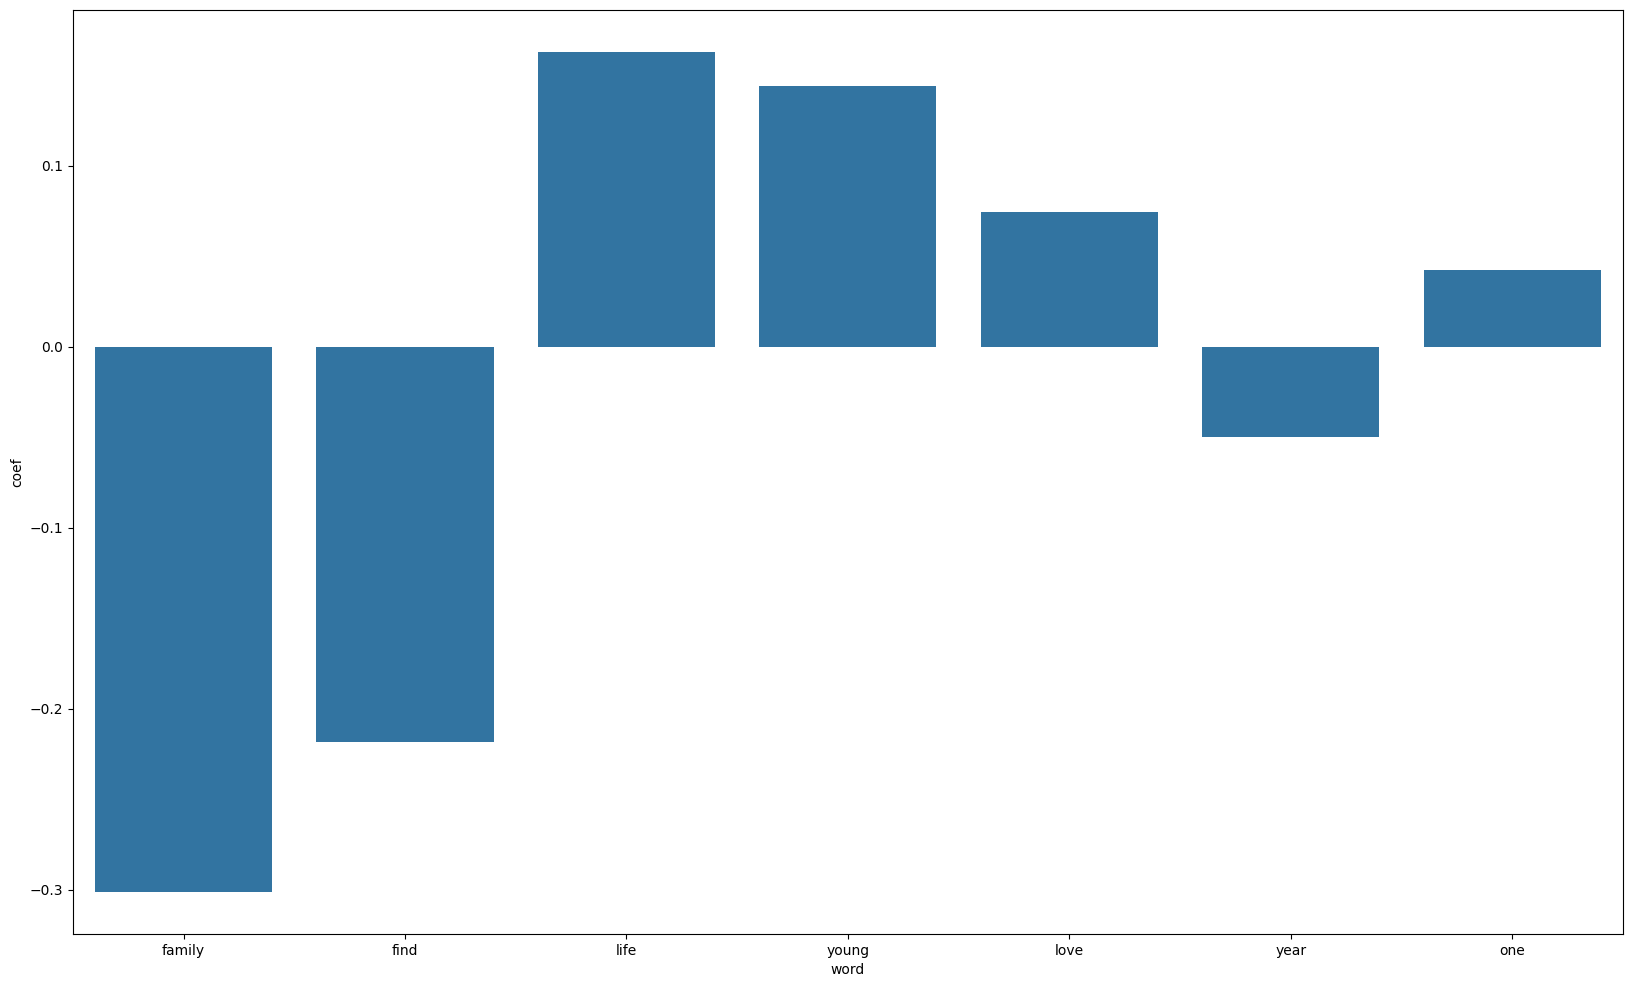

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the coefficients for each genre
coefficients = genre_weights_score_pipeline['regressor'].coef_
words = genre_weights_score_pipeline['vectorizer'].get_feature_names_out()


# Find the most significant words. The significance is determined by the
# magnitude of the coefficients in the linear regression model
results_df = {
    'coef': coefficients,
    'word': words,
}
results_df = pd.DataFrame(results_df)
results_df['abs_coef'] = np.abs(results_df['coef'])
significant_words = results_df.sort_values(by='abs_coef', ascending=False).iloc[:20]

plt.figure(figsize=(20,12))  # set plot size (denoted in inches) Source: https://stackoverflow.com/questions/59447378/sklearn-plot-tree-plot-is-too-small
sns.barplot(significant_words, x='word', y='coef')

[np.float64(0.015326677049784498), np.float64(0.05125011240040724), 0.005823380933588274, -0.004250309458938473, -0.0011966255618143461]


<Axes: xlabel='label', ylabel='scores'>

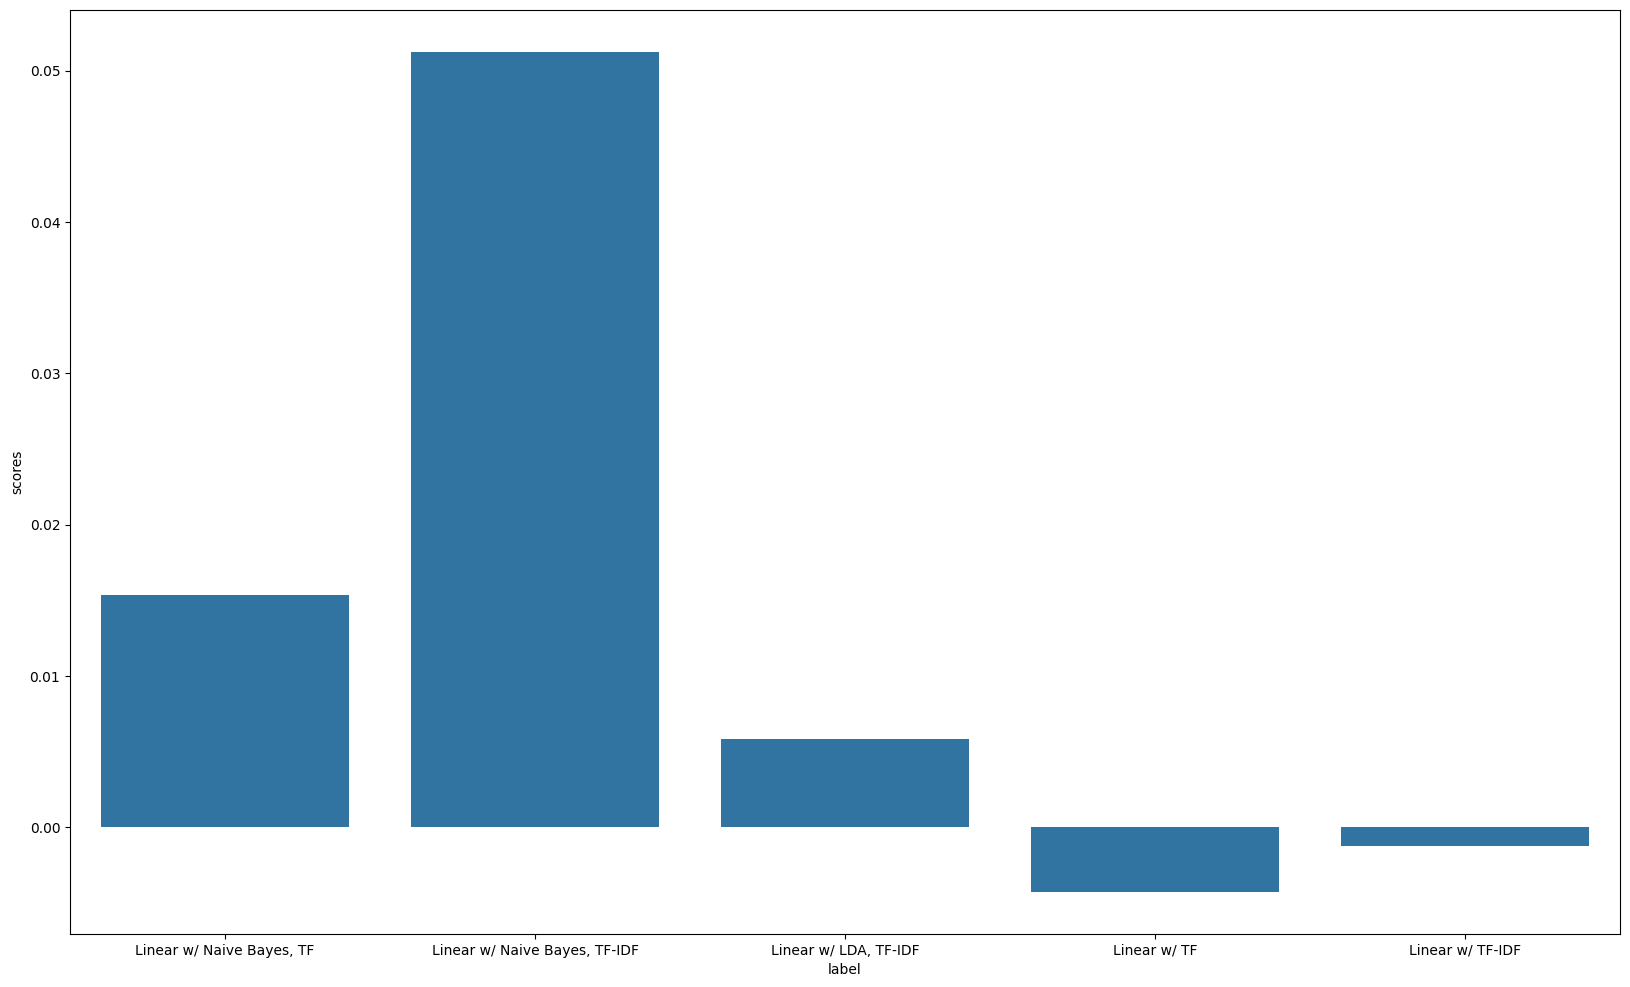

In [26]:
import seaborn as sns
print(model_scores)
model_scores_df = pd.DataFrame({
    'label': ['Linear w/ Naive Bayes, TF', 'Linear w/ Naive Bayes, TF-IDF', 'Linear w/ LDA, TF-IDF', 'Linear w/ TF', 'Linear w/ TF-IDF'],
    'scores': model_scores
})

# Plot the best results of each evaluated model
plt.figure(figsize=(20,12))  # set plot size (denoted in inches) Source: https://stackoverflow.com/questions/59447378/sklearn-plot-tree-plot-is-too-small
sns.barplot(data=model_scores_df, x='label', y='scores')

## Genre Analysis

In [27]:
import pandas as pd

In [28]:
# Load the cleaned dataset
filepath = 'https://raw.githubusercontent.com/anthonybrown0528/csc-442-course-project/refs/heads/main/dataset/clean/hw6/netflix_film_imdb_scores_cleaned_descriptions_df.csv'
df = pd.read_csv(filepath)

In [29]:
df.head()

,title,description_x,release_year,runtime,imdb_id,imdb_score,imdb_votes,show_id,type,director,...,country,date_added,age_certification,num_releases,listed_in,description_y,num_listed_in,first_cast,cast_freq_mean,genre_freq_mean
0,Monty Python and the Holy Grail,King Arthur accompany squire recruit Knights R...,1975,91,tt0071853,8.2,530877,s4218,Movie,"Terry Gilliam, Terry Jones",...,United Kingdom,"January 2, 2019",PG,1,"Action & Adventure, Classic Movies, Comedies",The Monty Python comedy clan skewers King Arth...,3,Graham Chapman,10.888889,831.000000
1,My Fair Lady,snobbish phonetics professor agree wager take ...,1964,170,tt0058385,7.8,94121,s1127,Movie,George Cukor,...,United States,"April 1, 2021",G,1,"Classic Movies, Music & Musicals",When a Cockney flower girl takes elocution les...,2,Audrey Hepburn,1.083333,203.500000
2,The Blue Lagoon,Two small child ship cook survive shipwreck fi...,1980,104,tt0080453,5.8,69053,s176,Movie,Randal Kleiser,...,United States,"September 1, 2021",R,1,"Dramas, Romantic Movies","Two shipwrecked children, stranded for years o...",2,Brooke Shields,1.375000,1446.500000
3,Bonnie and Clyde,In 1930s bore waitress Bonnie Parker fall love...,1967,110,tt0061418,7.7,111189,s6359,Movie,Arthur Penn,...,United States,"January 1, 2021",R,1,"Action & Adventure, Classic Movies, Dramas","Bonnie Parker and Clyde Barrow are young, in l...",3,Warren Beatty,1.777778,1076.333333
4,The Guns of Navarone,team allied saboteur assign impossible mission...,1961,158,tt0054953,7.5,50150,s178,Movie,J. Lee Thompson,...,"United Kingdom, United States","September 1, 2021",TV-14,1,"Action & Adventure, Classic Movies","During World War II, British forces launch an ...",2,Gregory Peck,1.300000,459.500000


In [30]:
# Select part of the dataset
column_subset = ['title', 'release_year', 'listed_in', 'description_x', 'imdb_score']
query_df = df[column_subset].copy()

query_df['score_above_threshold'] = df['imdb_score'] > 6
query_df

,title,release_year,listed_in,description_x,imdb_score,score_above_threshold
0,Monty Python and the Holy Grail,1975,"Action & Adventure, Classic Movies, Comedies",King Arthur accompany squire recruit Knights R...,8.2,True
1,My Fair Lady,1964,"Classic Movies, Music & Musicals",snobbish phonetics professor agree wager take ...,7.8,True
2,The Blue Lagoon,1980,"Dramas, Romantic Movies",Two small child ship cook survive shipwreck fi...,5.8,False
3,Bonnie and Clyde,1967,"Action & Adventure, Classic Movies, Dramas",In 1930s bore waitress Bonnie Parker fall love...,7.7,True
4,The Guns of Navarone,1961,"Action & Adventure, Classic Movies",team allied saboteur assign impossible mission...,7.5,True
...,...,...,...,...,...,...
2472,Myriam Fares: The Journey,2021,"Documentaries, International Movies, Music & M...",From pregnancy album preparation Lebanese sing...,2.3,False
2473,The Tambour of Retribution,2021,"Dramas, International Movies, Romantic Movies",son swordsman fall love daughter Tagaga social...,6.9,True
2474,Pitta Kathalu,2021,"International TV Shows, TV Dramas",Four different woman four journey love betraya...,5.1,False
2475,Loyiso Gola: Unlearning,2021,Stand-Up Comedy,South African comedian Loyiso Gola serve filte...,5.9,False


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
# Split the dataset into a training and test set
train_set, test_set = train_test_split(query_df, test_size=0.3, random_state=42)

In [33]:
features = ['genre']

In [34]:
def concat_genres(data):
  return ' '.join(data.to_list())

In [35]:
def separate_genre_df(data):
  movie_genre_map = {
      'title': [],
      'release_year': [],
      'genre': [],
      'imdb_score': [],
      'score_above_threshold': [],
      'description': []
  }

  for _, row in data.iterrows():
    genres = row['listed_in'].split(',')

    for genre in genres:
      movie_genre_map['title'].append(row['title'].strip())
      movie_genre_map['release_year'].append(row['release_year'])
      movie_genre_map['genre'].append(genre.strip().replace(' ', '_'))
      movie_genre_map['imdb_score'].append(row['imdb_score'])
      movie_genre_map['score_above_threshold'].append(row['score_above_threshold'])
      movie_genre_map['description'].append(row['description_x'])


  movie_genre_df = pd.DataFrame(movie_genre_map)

  movie_genre_df = movie_genre_df[movie_genre_df['genre'] != 'International Movies']
  movie_genre_df = movie_genre_df[movie_genre_df['genre'] != 'International TV Shows']

  movie_genre_df

  return movie_genre_df

data_cleaned_df = separate_genre_df(query_df)

movie_genre_concat_df = data_cleaned_df[['title', 'release_year', 'genre']].groupby(by=['title', 'release_year'], as_index=False).agg(concat_genres)
data_cleaned_genre_list_df = pd.merge(data_cleaned_df.drop(columns=['genre']).drop_duplicates(), movie_genre_concat_df.rename(columns={'genre': 'genres'}), how='inner', on=['title', 'release_year'])

feature_df = data_cleaned_genre_list_df['genres'].values
target_df = data_cleaned_genre_list_df['score_above_threshold'].values

data_cleaned_genre_list_df

,title,release_year,imdb_score,score_above_threshold,description,genres
0,Monty Python and the Holy Grail,1975,8.2,True,King Arthur accompany squire recruit Knights R...,Action_&_Adventure Classic_Movies Comedies
1,My Fair Lady,1964,7.8,True,snobbish phonetics professor agree wager take ...,Classic_Movies Music_&_Musicals
2,The Blue Lagoon,1980,5.8,False,Two small child ship cook survive shipwreck fi...,Dramas Romantic_Movies
3,Bonnie and Clyde,1967,7.7,True,In 1930s bore waitress Bonnie Parker fall love...,Action_&_Adventure Classic_Movies Dramas
4,The Guns of Navarone,1961,7.5,True,team allied saboteur assign impossible mission...,Action_&_Adventure Classic_Movies
...,...,...,...,...,...,...
2472,Myriam Fares: The Journey,2021,2.3,False,From pregnancy album preparation Lebanese sing...,Documentaries International_Movies Music_&_Mus...
2473,The Tambour of Retribution,2021,6.9,True,son swordsman fall love daughter Tagaga social...,Dramas International_Movies Romantic_Movies
2474,Pitta Kathalu,2021,5.1,False,Four different woman four journey love betraya...,International_TV_Shows TV_Dramas
2475,Loyiso Gola: Unlearning,2021,5.9,False,South African comedian Loyiso Gola serve filte...,Stand-Up_Comedy


In [36]:
data_cleaned_genre_list_df['score_above_threshold'].value_counts()

,count
score_above_threshold,
True,1611
False,866


In [37]:
X_train = data_cleaned_genre_list_df['genres'].values
y_train = data_cleaned_genre_list_df['score_above_threshold'].values

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [39]:
model_score_map = {
    'model': [],
    'score': [],
    'type': []
}

In [40]:
pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('estimator', DecisionTreeClassifier())
])

grid_search = GridSearchCV(
    pipeline,
    param_grid={
        'estimator__max_depth': [1, 2, 3, 4, 5]
    });

grid_search = grid_search.fit(X_train, y_train)

vectorizer = grid_search.best_estimator_['vectorizer']
estimator_opt = grid_search.best_estimator_['estimator']

cv_results_df = pd.DataFrame(grid_search.cv_results_)

model_score_map['model'].append('Decision Tree w/ TF')
model_score_map['score'].append(float(cv_results_df[cv_results_df['rank_test_score'] == 1]['mean_test_score'].iloc[0]))
model_score_map['type'].append('clf')

cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.019640,0.000718,0.006422,0.001603,1,{'estimator__max_depth': 1},0.635081,0.647177,0.676768,0.650505,0.668687,0.655644,0.015082,5
1,0.017542,0.001724,0.006005,0.001031,2,{'estimator__max_depth': 2},0.703629,0.697581,0.709091,0.688889,0.701010,0.700040,0.006725,4
2,0.017286,0.000537,0.005209,0.000125,3,{'estimator__max_depth': 3},0.659274,0.701613,0.709091,0.737374,0.701010,0.701672,0.025011,3
3,0.018020,0.001489,0.005986,0.000786,4,{'estimator__max_depth': 4},0.677419,0.693548,0.709091,0.737374,0.696970,0.702880,0.019993,2
4,0.018466,0.000711,0.005098,0.000341,5,{'estimator__max_depth': 5},0.661290,0.703629,0.719192,0.735354,0.701010,0.704095,0.024686,1


In [41]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

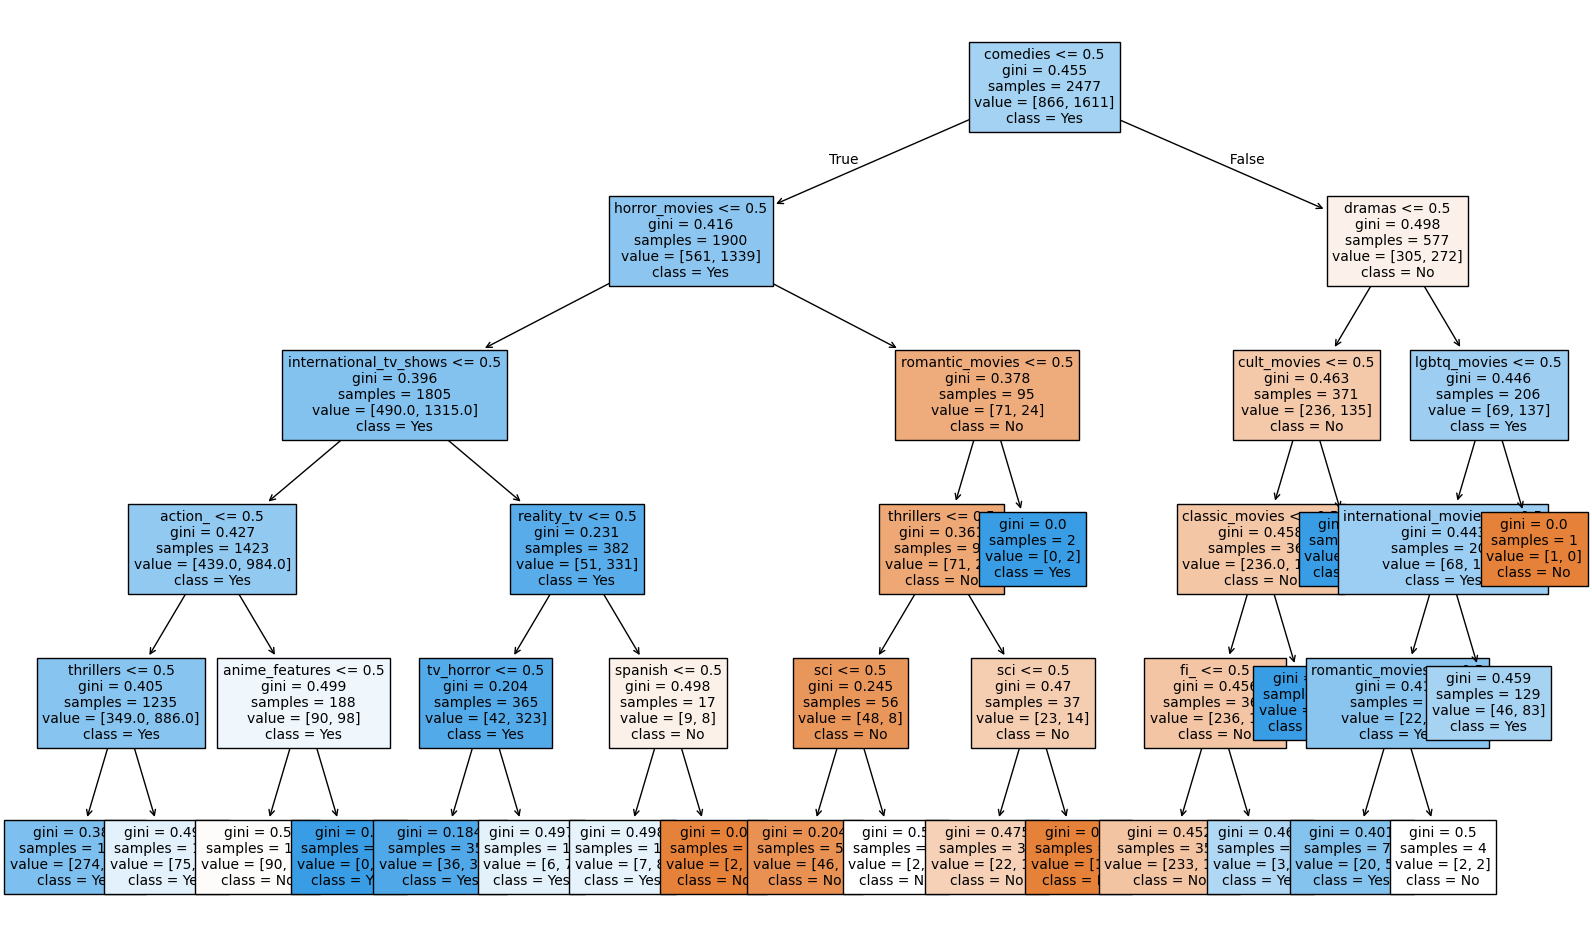

In [42]:
plt.figure(figsize=(20,12))  # set plot size (denoted in inches) Source: https://stackoverflow.com/questions/59447378/sklearn-plot-tree-plot-is-too-small
plot_tree(estimator_opt, class_names=['No', 'Yes'], feature_names=vectorizer.get_feature_names_out(), filled = True, fontsize=10);

In [43]:
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('estimator', DecisionTreeClassifier())
])

grid_search = GridSearchCV(
    pipeline,
    param_grid={
        'estimator__max_depth': [1, 2, 3, 4, 5, 10, 20, 30]
    });

grid_search = grid_search.fit(X_train, y_train)

vectorizer = grid_search.best_estimator_['vectorizer']
estimator_opt = grid_search.best_estimator_['estimator']

cv_results_df = pd.DataFrame(grid_search.cv_results_)

model_score_map['model'].append('Decision Tree w/ TF-IDF')
model_score_map['score'].append(float(cv_results_df[cv_results_df['rank_test_score'] == 1]['mean_test_score'].iloc[0]))
model_score_map['type'].append('clf')

cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.015445,0.005080,0.004935,0.001113,1,{'estimator__max_depth': 1},0.641129,0.651210,0.674747,0.682828,0.668687,0.663720,0.015351,8
1,0.012809,0.000773,0.004553,0.000437,2,{'estimator__max_depth': 2},0.709677,0.699597,0.705051,0.725253,0.696970,0.707309,0.009991,5
2,0.011818,0.000401,0.003735,0.000192,3,{'estimator__max_depth': 3},0.711694,0.703629,0.715152,0.725253,0.709091,0.712964,0.007205,2
3,0.012129,0.000245,0.003780,0.000058,4,{'estimator__max_depth': 4},0.709677,0.695565,0.715152,0.745455,0.709091,0.714988,0.016544,1
4,0.012594,0.000180,0.004207,0.000894,5,{'estimator__max_depth': 5},0.693548,0.705645,0.713131,0.743434,0.703030,0.711758,0.017032,3
5,0.015346,0.001896,0.004225,0.000841,10,{'estimator__max_depth': 10},0.697581,0.691532,0.707071,0.745455,0.694949,0.707318,0.019756,4
6,0.016607,0.000212,0.004305,0.000546,20,{'estimator__max_depth': 20},0.681452,0.691532,0.707071,0.727273,0.692929,0.700051,0.015872,6
7,0.018556,0.001968,0.003905,0.000064,30,{'estimator__max_depth': 30},0.677419,0.695565,0.709091,0.723232,0.690909,0.699243,0.015695,7


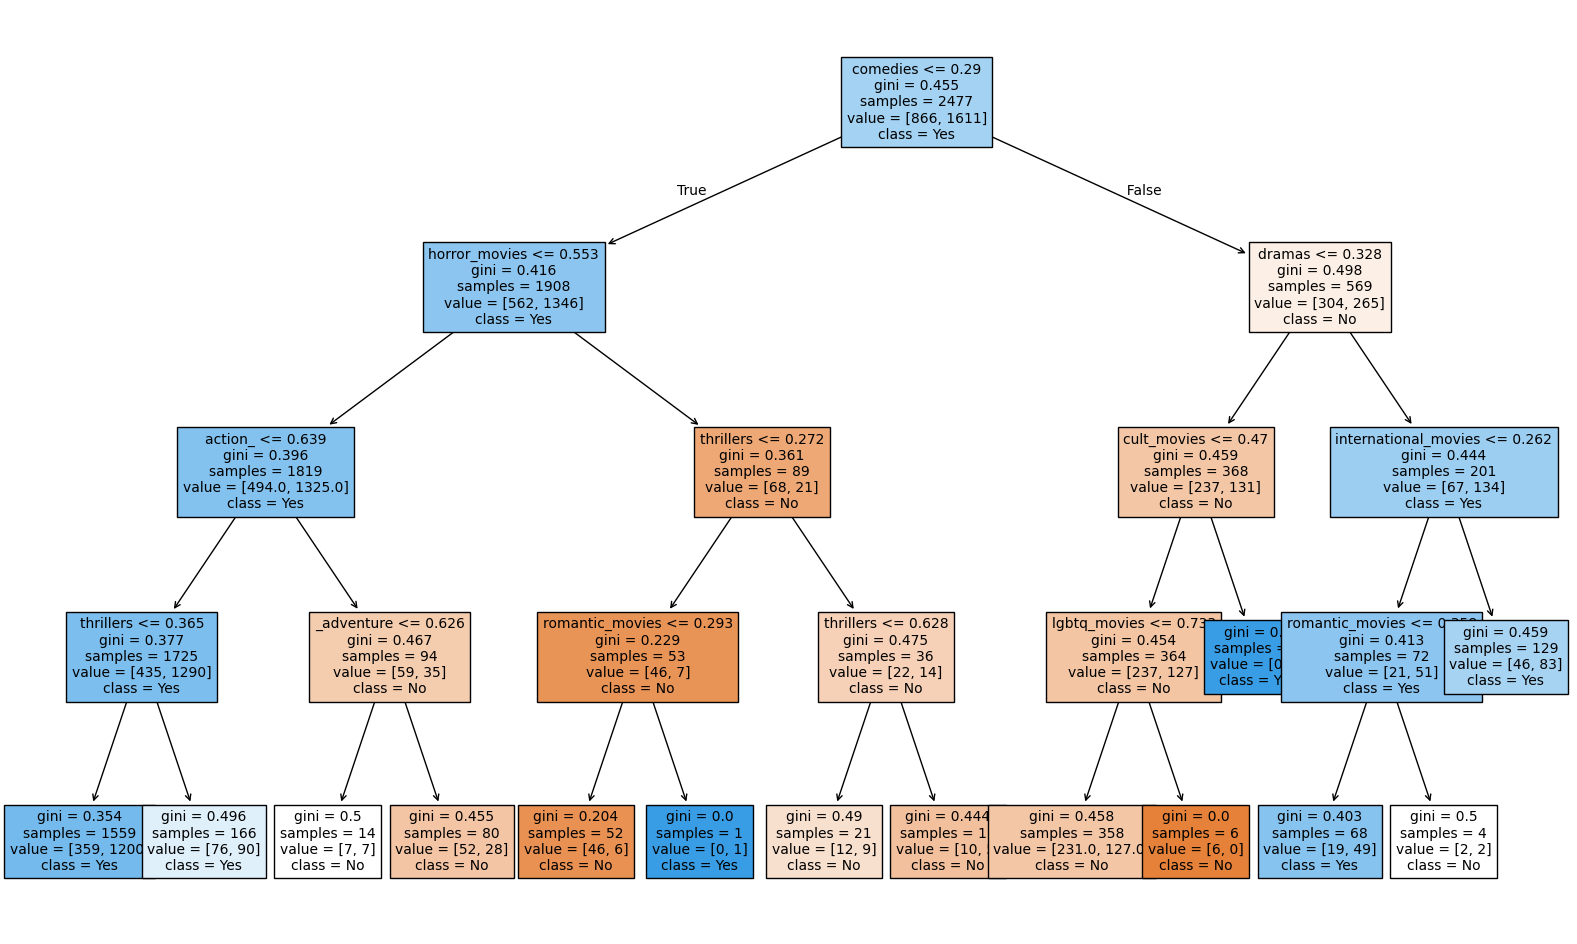

In [44]:
plt.figure(figsize=(20,12))  # set plot size (denoted in inches) Source: https://stackoverflow.com/questions/59447378/sklearn-plot-tree-plot-is-too-small
plot_tree(estimator_opt, class_names=['No', 'Yes'], feature_names=vectorizer.get_feature_names_out(), filled = True, fontsize=10);

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

In [46]:
pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('estimator', LinearRegression())
])

X = data_cleaned_genre_list_df['genres'].values
y = data_cleaned_genre_list_df['imdb_score'].values

_, _, estimator, test_score = cross_validate(pipeline, X, y, return_estimator=True).items()
test_scores_df = pd.DataFrame({
    test_score[0]: test_score[1]
})

best_model_idx = np.argmax(test_scores_df[test_score[0]].values)

model_score_map['model'].append('Linear Regression w/ TF')
model_score_map['score'].append(float(test_score[1].mean()))
model_score_map['type'].append('reg')

In [47]:
test_scores_df

,test_score
0,0.037649
1,0.176150
2,0.150112
3,0.219762
4,0.133190


In [48]:
import seaborn as sns

<Axes: xlabel='genre', ylabel='coef'>

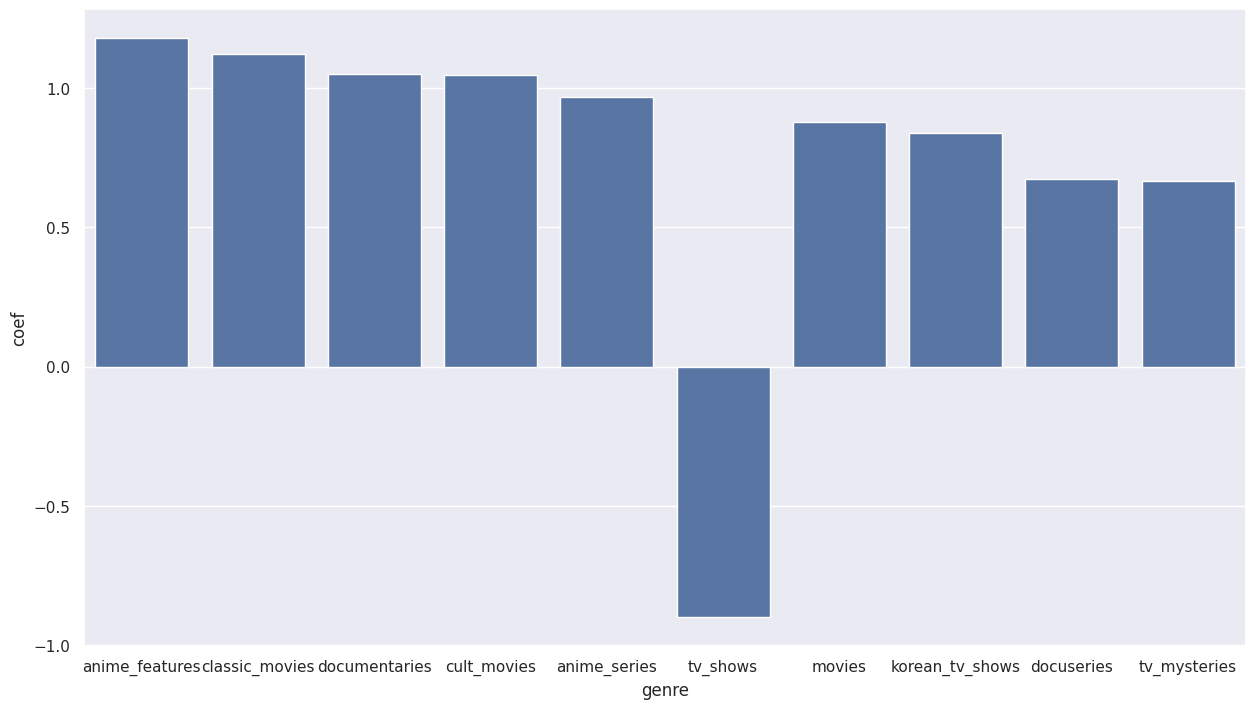

In [49]:
coefs = estimator[1][best_model_idx]['estimator'].coef_
genre_labels = estimator[1][best_model_idx]['vectorizer'].get_feature_names_out()

coef_df = pd.DataFrame({'coef': coefs, 'genre': genre_labels})
coef_df['abs_coef'] = np.abs(coef_df['coef'])

coef_df_significant = coef_df.sort_values(by='abs_coef', ascending=False).head(10)

sns.set_theme(rc={'figure.figsize':(15,8.27)})
sns.barplot(coef_df_significant, x='genre', y='coef')

In [50]:
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('estimator', LinearRegression())
])

X = data_cleaned_genre_list_df['genres'].values
y = data_cleaned_genre_list_df['imdb_score'].values

_, _, estimator, test_score = cross_validate(pipeline, X, y, return_estimator=True).items()
test_scores_df = pd.DataFrame({
    test_score[0]: test_score[1]
})

best_model_idx = np.argmax(test_scores_df[test_score[0]].values)

model_score_map['model'].append('Linear Regression w/ TF-IDF')
model_score_map['score'].append(float(test_score[1].mean()))
model_score_map['type'].append('reg')

In [51]:
test_scores_df

,test_score
0,0.049469
1,0.177176
2,0.154390
3,0.240248
4,0.138357


In [52]:
test_scores_df.mean()

,0
test_score,0.151928


<Axes: xlabel='genre', ylabel='coef'>

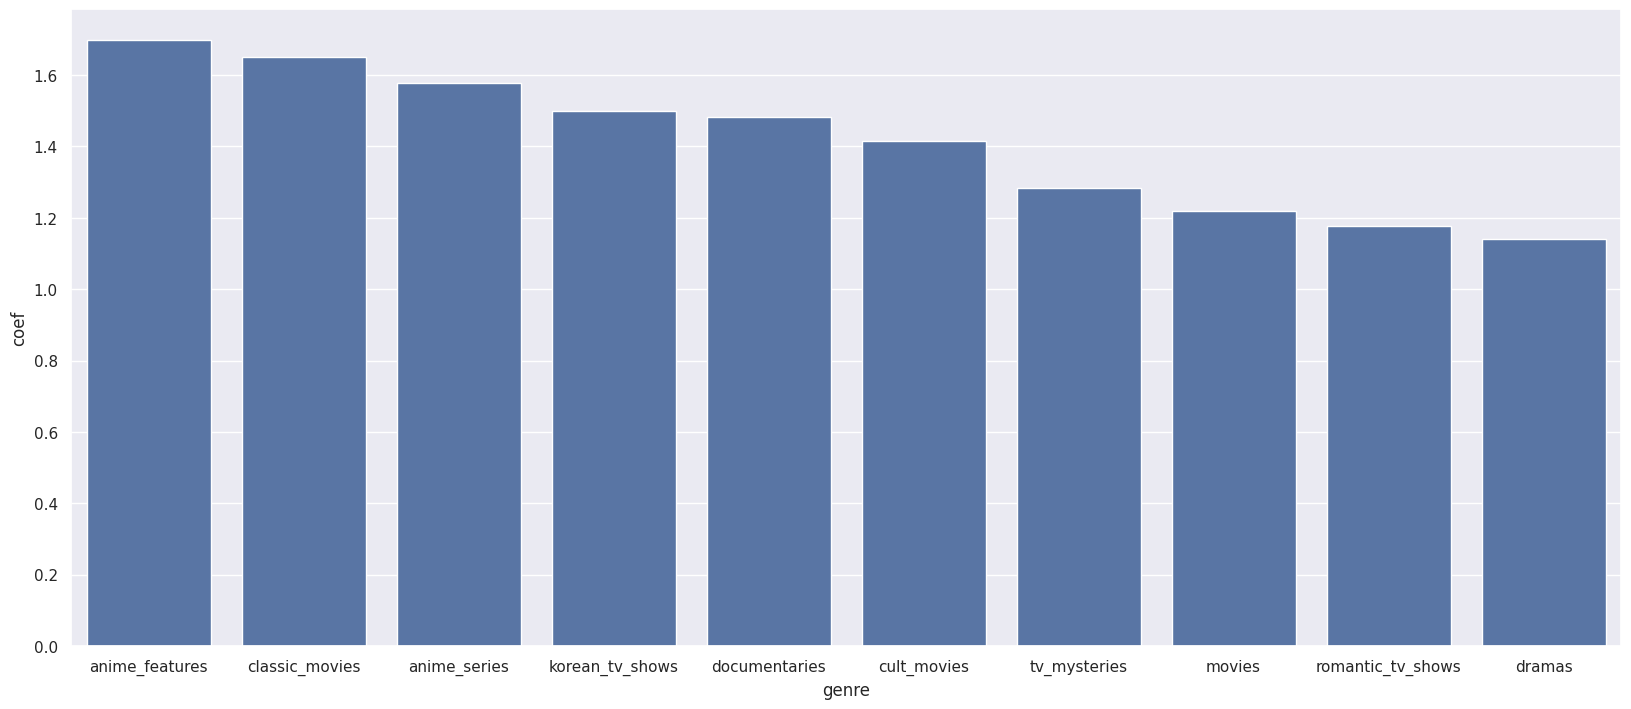

In [53]:
coefs = estimator[1][best_model_idx]['estimator'].coef_
genre_labels = estimator[1][best_model_idx]['vectorizer'].get_feature_names_out()

coef_df = pd.DataFrame({'coef': coefs, 'genre': genre_labels})
coef_df['abs_coef'] = np.abs(coef_df['coef'])

coef_df_significant = coef_df.sort_values(by='abs_coef', ascending=False).head(10)

sns.set_theme(rc={'figure.figsize':(20,8.27)})
sns.barplot(coef_df_significant, x='genre', y='coef')

In [54]:
from sklearn.linear_model import Lasso, Ridge

In [55]:
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('estimator', Lasso())
])

X = data_cleaned_genre_list_df['genres'].values
y = data_cleaned_genre_list_df['imdb_score'].values

grid_search = GridSearchCV(pipeline, param_grid={
    'estimator__alpha': [0.001, 0.01, 0.1]
})
grid_search = grid_search.fit(X, y)

cv_results_df = pd.DataFrame(grid_search.cv_results_)

model_score_map['model'].append('Lasso w/ TF-IDF')
model_score_map['score'].append(float(cv_results_df[cv_results_df['rank_test_score'] == 1]['mean_test_score'].iloc[0]))
model_score_map['type'].append('reg')

cv_results_df[['mean_test_score', 'std_test_score', 'rank_test_score']]

,mean_test_score,std_test_score,rank_test_score
0,0.145887,0.074507,1
1,0.112726,0.063753,2
2,-0.031582,0.023603,3


<Axes: xlabel='genre', ylabel='coef'>

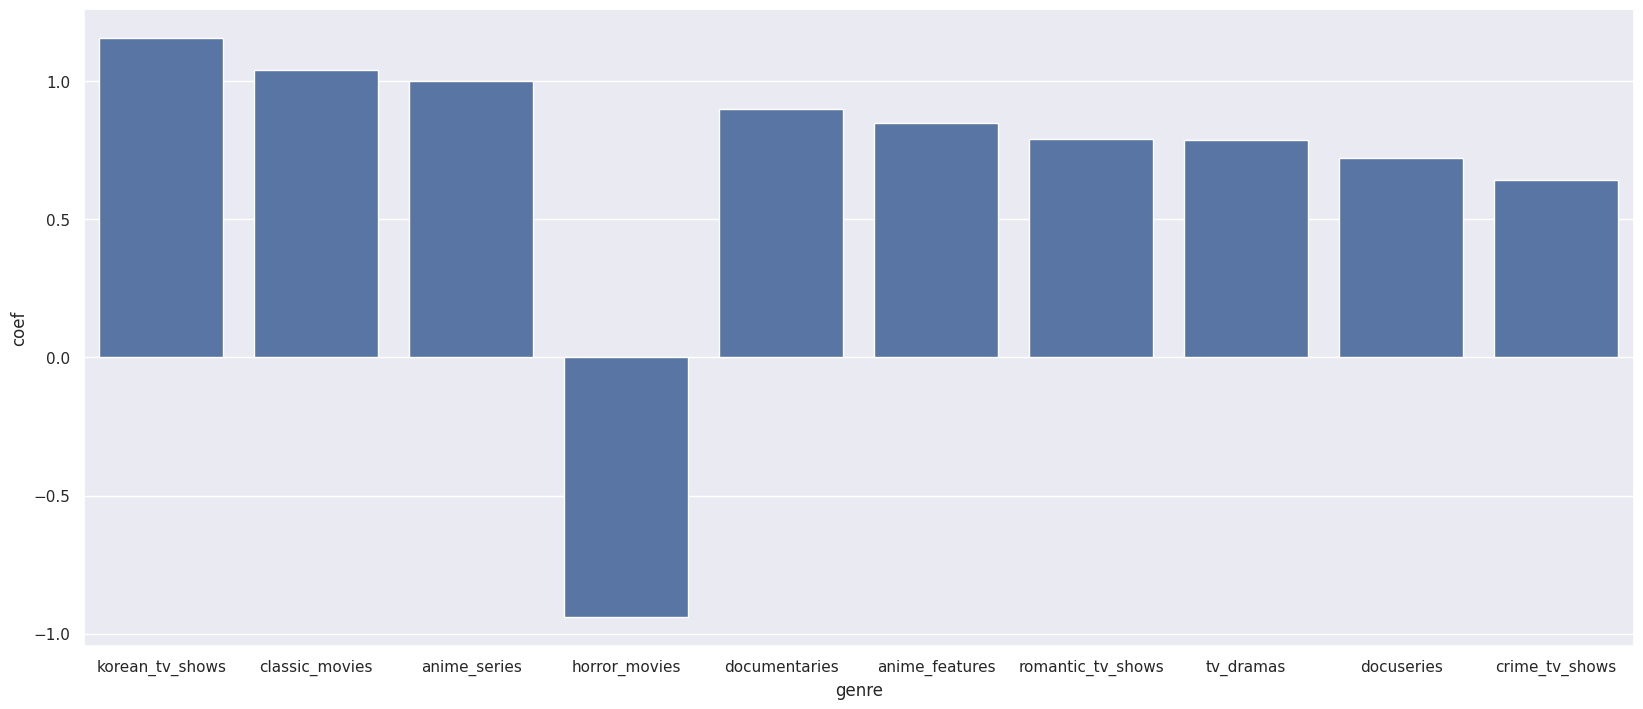

In [56]:
coefs = grid_search.best_estimator_['estimator'].coef_
genre_labels = grid_search.best_estimator_['vectorizer'].get_feature_names_out()

coef_df = pd.DataFrame({'coef': coefs, 'genre': genre_labels})
coef_df['abs_coef'] = np.abs(coef_df['coef'])

coef_df_significant = coef_df.sort_values(by='abs_coef', ascending=False).head(10)

sns.set_theme(rc={'figure.figsize':(20,8.27)})
sns.barplot(coef_df_significant, x='genre', y='coef')

In [57]:
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('estimator', Ridge())
])

X = data_cleaned_genre_list_df['genres'].values
y = data_cleaned_genre_list_df['imdb_score'].values

grid_search = GridSearchCV(pipeline, param_grid={
    'estimator__alpha': [0.001, 0.01, 0.1, 0.2, 0.5]
})
grid_search = grid_search.fit(X, y)

cv_results_df = pd.DataFrame(grid_search.cv_results_)

model_score_map['model'].append('Ridge w/ TF-IDF')
model_score_map['score'].append(float(cv_results_df[cv_results_df['rank_test_score'] == 1]['mean_test_score'].iloc[0]))
model_score_map['type'].append('reg')

cv_results_df[['mean_test_score', 'std_test_score', 'rank_test_score']]

,mean_test_score,std_test_score,rank_test_score
0,0.151939,0.061805,1
1,0.151896,0.061982,2
2,0.151516,0.063554,3
3,0.151171,0.064964,4
4,0.150468,0.067808,5


<Axes: xlabel='genre', ylabel='coef'>

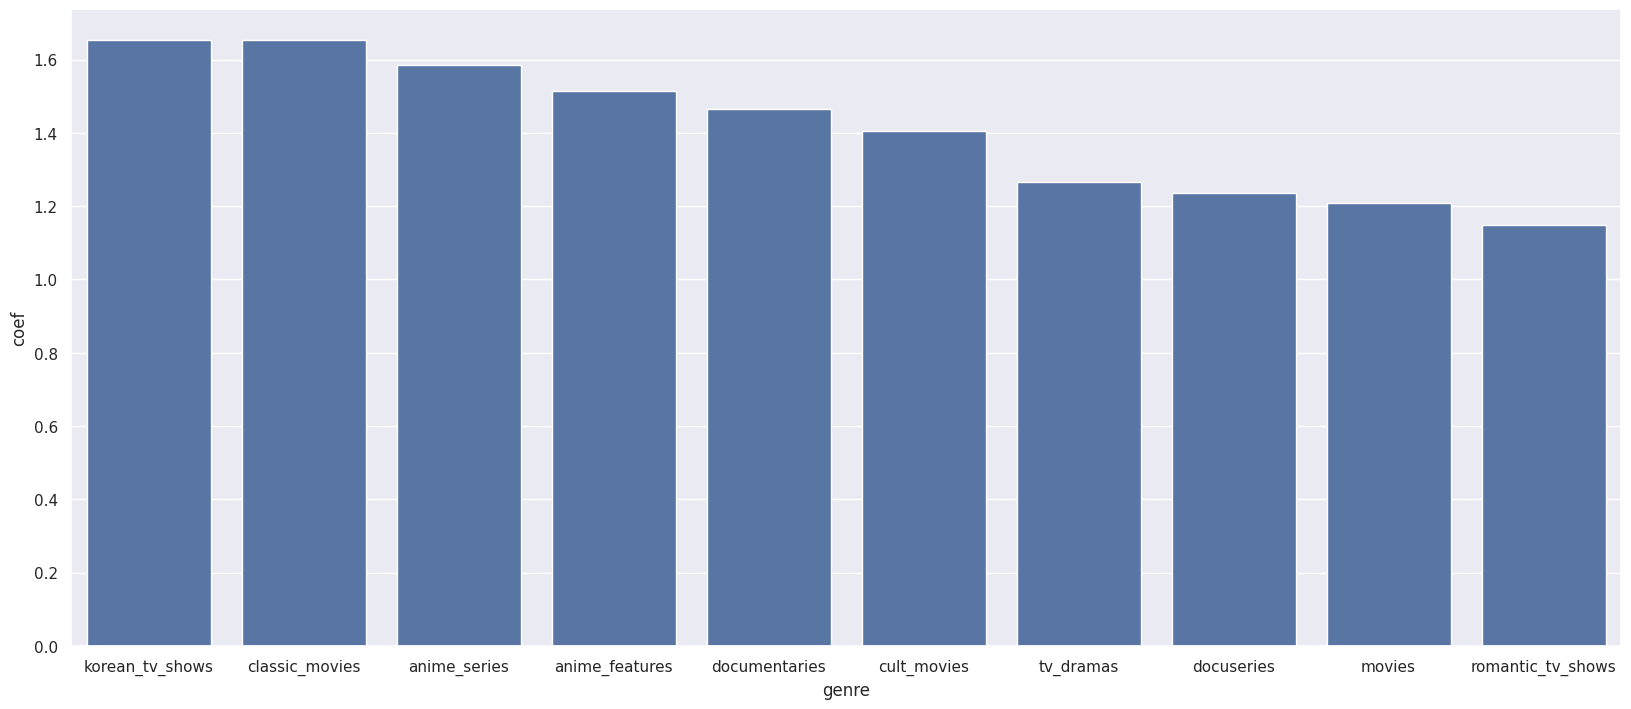

In [58]:
coefs = grid_search.best_estimator_['estimator'].coef_
genre_labels = grid_search.best_estimator_['vectorizer'].get_feature_names_out()

coef_df = pd.DataFrame({'coef': coefs, 'genre': genre_labels})
coef_df['abs_coef'] = np.abs(coef_df['coef'])

coef_df_significant = coef_df.sort_values(by='abs_coef', ascending=False).head(10)

sns.set_theme(rc={'figure.figsize':(20,8.27)})
sns.barplot(coef_df_significant, x='genre', y='coef')

In [59]:
model_score_df = pd.DataFrame(model_score_map)
import seaborn as sns

<Axes: xlabel='model', ylabel='score'>

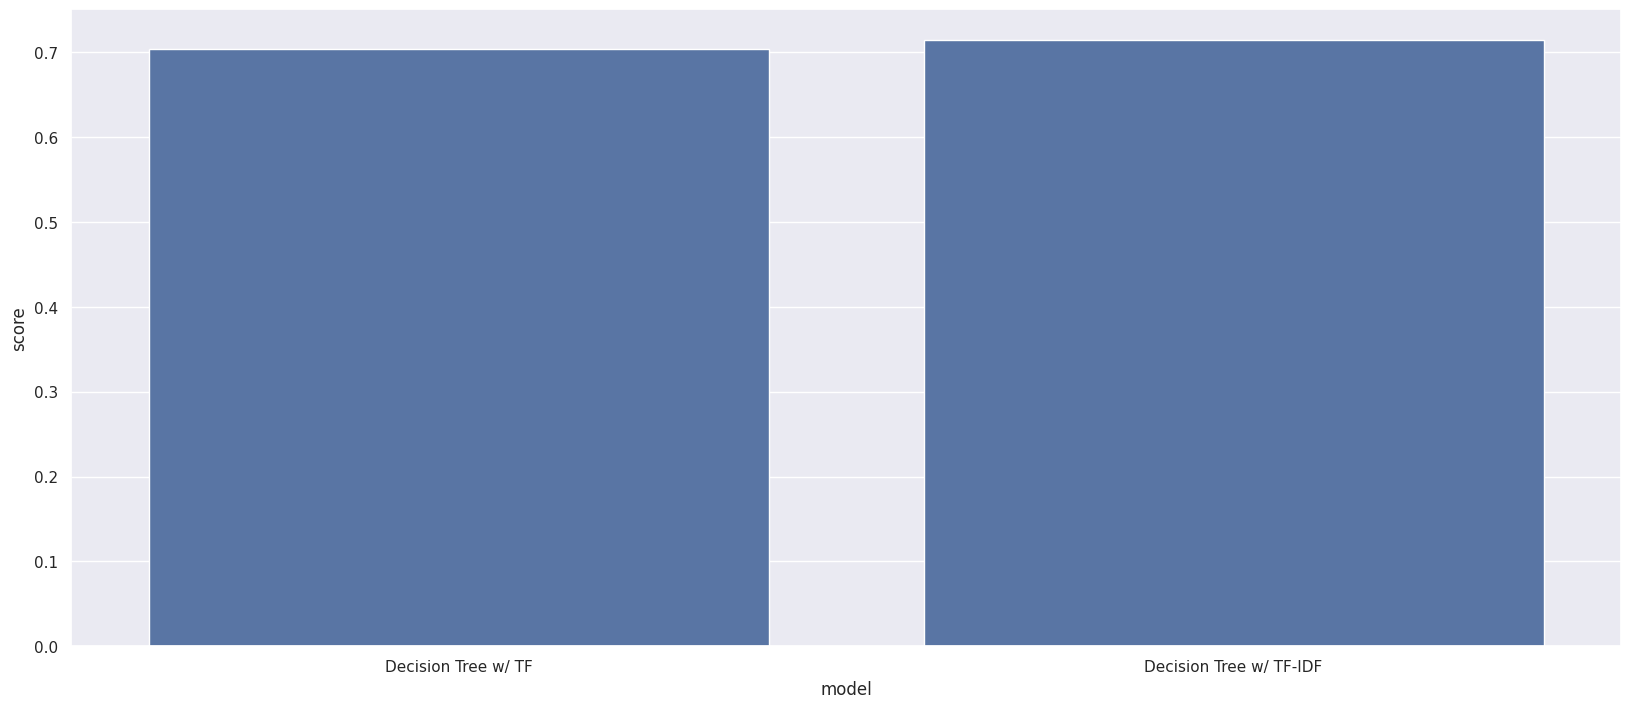

In [60]:
sns.barplot(model_score_df[model_score_df['type'] == 'clf'], x='model', y='score')

                         model     score type
0          Decision Tree w/ TF  0.704095  clf
1      Decision Tree w/ TF-IDF  0.714988  clf
2      Linear Regression w/ TF  0.143372  reg
3  Linear Regression w/ TF-IDF  0.151928  reg
4              Lasso w/ TF-IDF  0.145887  reg
5              Ridge w/ TF-IDF  0.151939  reg


<Axes: xlabel='model', ylabel='score'>

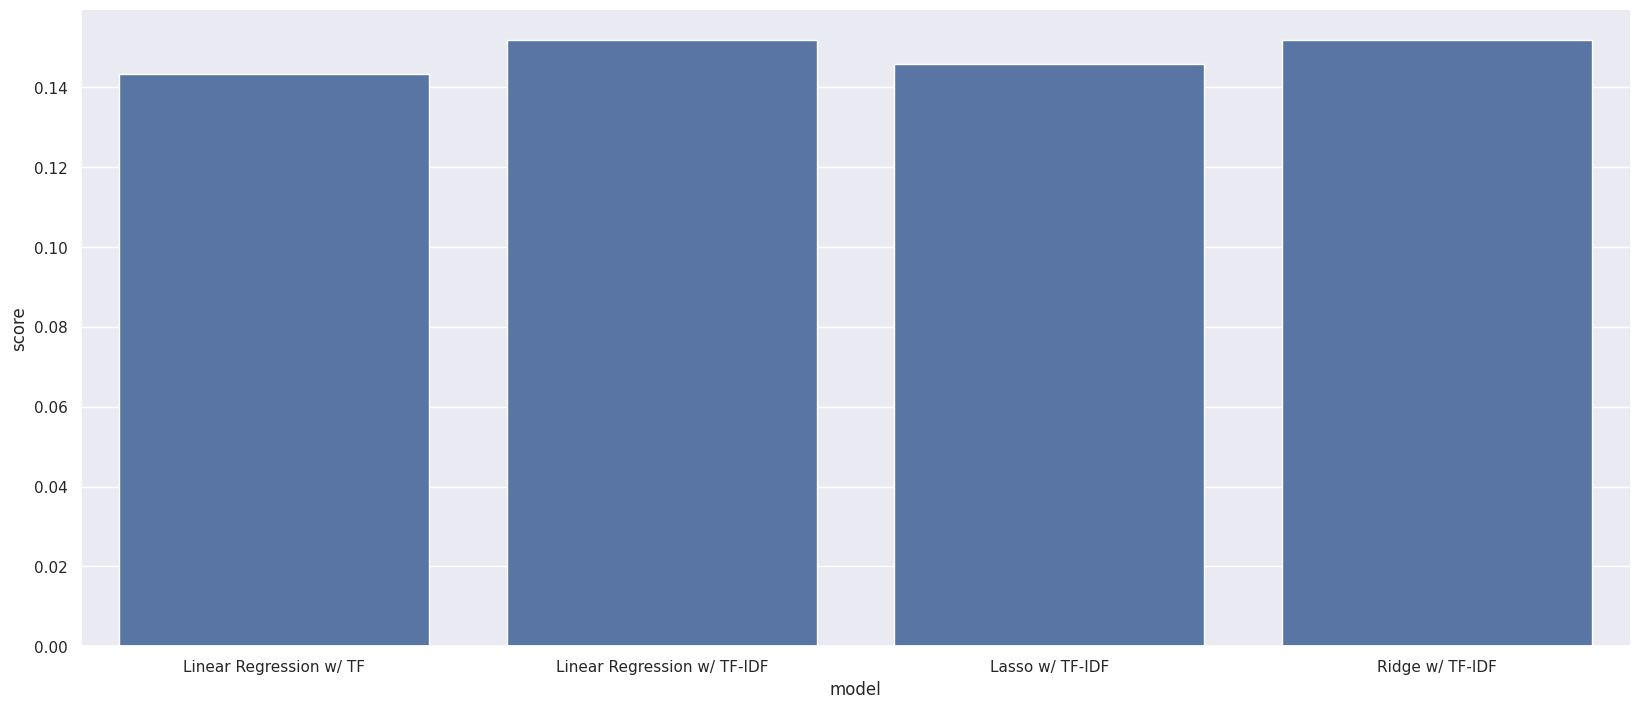

In [61]:
print(model_score_df)
sns.barplot(model_score_df[model_score_df['type'] == 'reg'], x='model', y='score')